# Binary Baseband Data Transmission

If we are to send binary data (i.e. 0's and 1')through a baseband channel:

![title](1.png)

Binary digital/analog spectrogram

![title](2.png)

# Ограничение спектра

If limit the spectrum above a certain frequency, some of the problems can be solved. After that, you can confidently set the sampling frequency fs = 2fm, which eliminates the elision in the restored signal.

![title](3.png)

# Сглаживающий фильтр(Smoothing filter)

Image smoothing filters, which include the Gaussian, Maximum, Mean, Median, Minimum, Non-Local Means, Percentile, and Rank filters, can be applied to reduce the amount of noise in an image. You should note that although these filters can effectively reduce noise, they must be used with care so as to not alter important information contained in the image.

Savitzky-Golay filter. It uses least squares to regress a small window of your data onto a polynomial, then uses the polynomial to estimate the point in the center of the window. Finally the window is shifted forward by one data point and the process repeats. This continues until every point has been optimally adjusted relative to its neighbors. It works great even with noisy samples from non-periodic and non-linear sources.

Generating the noisy signal(产生噪声信号)(Генерация зашумленного сигнала)

In [1]:
import numpy as np
# Generating the noisy signal
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.cos(x) + np.random.random(100)

In [2]:
from scipy.signal import savgol_filter
# Savitzky-Golay filter
y_filtered = savgol_filter(y, 99, 3)

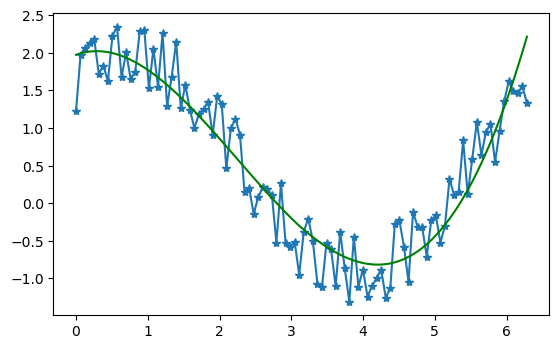

In [3]:
import matplotlib.pyplot as plt
# Plotting
fig = plt.figure()
ax = fig.subplots()
p = ax.plot(x, y, '-*')
p, = ax.plot(x, y_filtered, 'g')
plt.subplots_adjust(bottom=0.25)

In this example, we start with a window size of 99, which means that the function will take 99 points (almost all the points) of the initial signal to compute an average.

# Согласованная фильтрация (Matched filter)

A matched filter is a linear optimal filter based on the known spectral characteristics of the useful signal and noise. Matched filters are designed to isolate signals of a known shape against a background of noise. Optimality refers to the maximum signal-to-noise ratio at the filter output, while the waveform changes when passing through the filter.

Another way of thinking about matched filters is that the receiver correlates the received signal with the known template signal. The template signal is essentially the pulses the transmitter sends, irrespective of the phase/amplitude shifts applied to them. Recall that filtering is done by convolution, which is basically correlation (in fact they are mathematically the same when the template is symmetrical). This process of correlating the received signal with the template gives us our best chance at recovering what was sent, and it is why it’s theoretically optimal. As an analogy, think of an image recognition system that looks for faces using a template of a face and a 2D correlation:

![title](4.png)